Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/IMDb.csv")

Data Preprocessing

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.describe()

,Year,Rating
count,14980.000000,7919.000000
mean,-1987.012350,5.842758
std,25.417532,1.384783
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,14.000000


In [6]:
df.shape

(15509, 10)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14980 non-null  float64
 2   Duration  7241 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12356 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()

Name           0
Year         529
Duration    8268
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2385
Actor 3     3153
dtype: int64

Data Cleaning

In [9]:
df.dropna(inplace=True)

In [10]:
df = df.fillna('Unknown')

In [11]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [32]:
# Clean 'Votes' column: remove commas and convert to float
df['Votes'] = df['Votes'].apply(lambda x: str(x).replace(',', '')).astype(float)

Analysing the data

In [33]:
df.describe()

,Year,Rating,Votes
count,5653.00000,5653.000000,5653.000000
mean,-1996.23262,5.897806,2699.604458
std,19.74586,1.381307,13658.561093
min,-2021.00000,1.100000,5.000000
25%,-2013.00000,5.000000,30.000000
50%,-2002.00000,6.100000,131.000000
75%,-1983.00000,6.900000,922.000000
max,-1931.00000,10.000000,591417.000000


In [34]:
df["Rating"].value_counts()

Rating
6.8     199
6.5     192
6.2     189
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: count, Length: 83, dtype: int64

Data Visualization

In [35]:
sns.set()

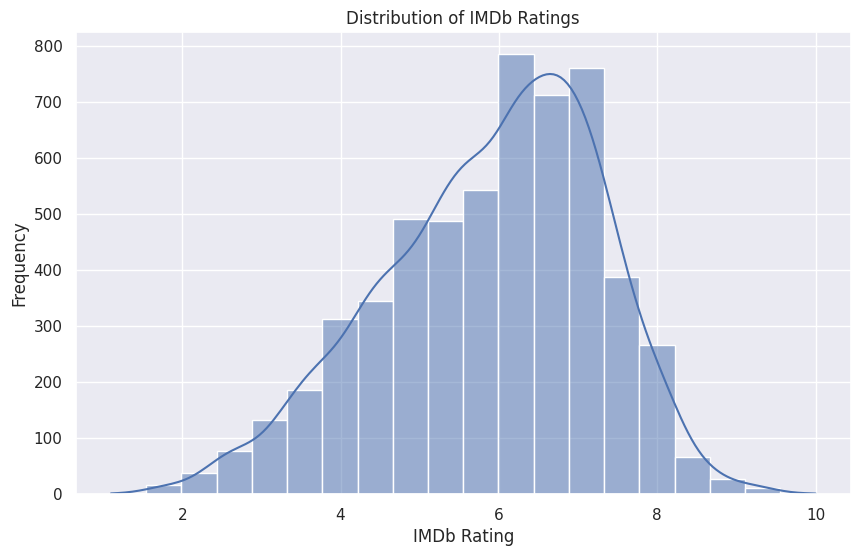

In [36]:
# Distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

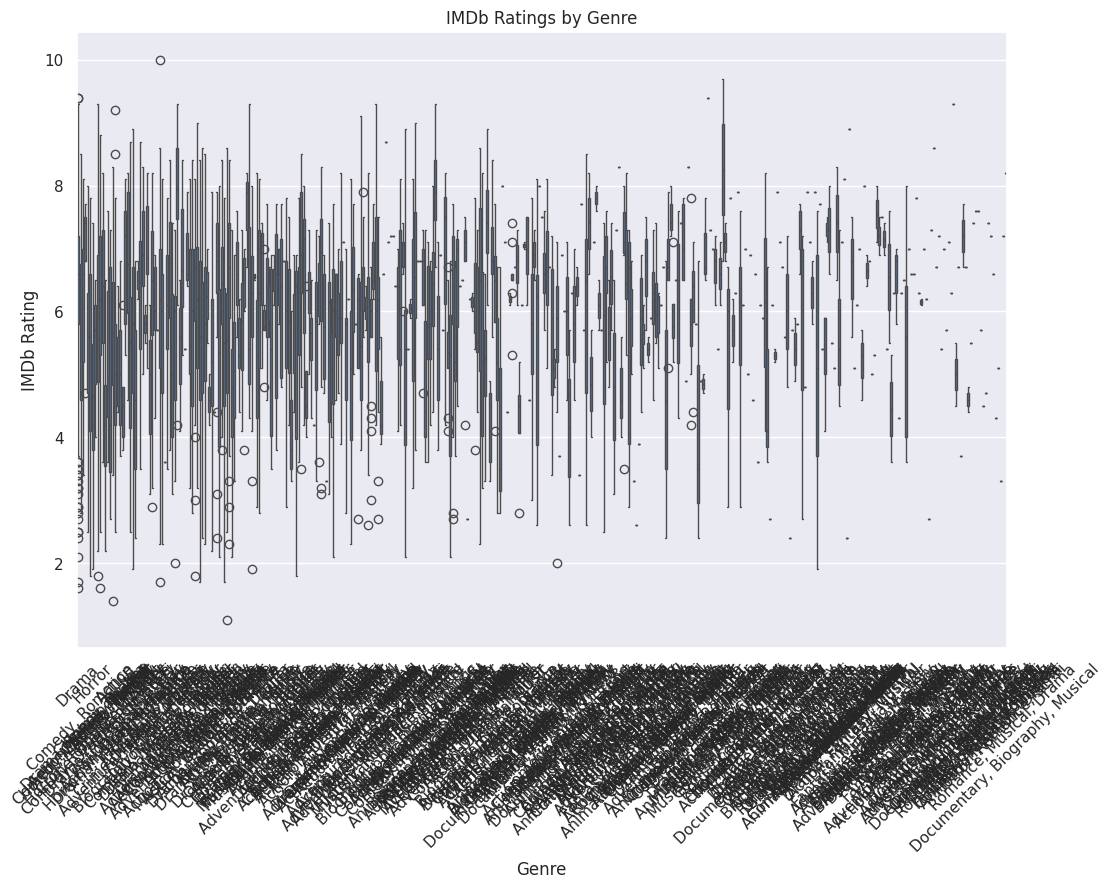

In [37]:
# Boxplot of IMDb ratings by genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('IMDb Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()

Feature Selection

In [38]:
# Select relevant features and target variable
features = ['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

In [39]:
X = df[features]
y = df[target]

In [40]:
# Remove 'min' from Duration and convert to integer
X['Duration'] = X['Duration'].str.replace(' min', '').astype(float)

<ipython-input-40-d3e679f670fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Duration'] = X['Duration'].str.replace(' min', '').astype(float)


In [41]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preprocessing and Modeling

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Define column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), ['Year', 'Duration', 'Votes']),('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])])

In [45]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [46]:
print(X.dtypes)

Year        float64
Duration    float64
Genre        object
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [47]:
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    print(f'{col} unique values: {X[col].nunique()}')

Genre unique values: 375
Director unique values: 2427
Actor 1 unique values: 1955
Actor 2 unique values: 2317
Actor 3 unique values: 2551


In [48]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)],verbose=True)

In [49]:
# Train the model
pipeline.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total= 1.0min


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('model', RandomForestRegressor(random_state=42))],
         verbose=True)

Model Evaluation

In [53]:
# Predict the ratings
y_pred = pipeline.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
# Mean Absolute Error (MAE)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²) Score: {r2}')

# Mean Absolute Percentage Error (MAPE)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error: 0.8121476569407605
Mean Absolute Error (MAE): 0.8121476569407605
Mean Squared Error (MSE): 1.1668217550839965
Root Mean Squared Error (RMSE): 1.080195239335925
R-squared (R²) Score: 0.38818821363625333
Mean Absolute Percentage Error (MAPE): 16.847194124061353


In [57]:
# Example data point for prediction
new_data = pd.DataFrame({
    'Year': [2024],
    'Duration': [120],
    'Genre': ['Drama'],
    'Votes': [5000],
    'Director': ['New Director'],
    'Actor 1': ['Actor A'],
    'Actor 2': ['Actor B'],
    'Actor 3': ['Actor C']
})

# Predict the rating for the new data point
predicted_rating = pipeline.predict(new_data)
print(f'Predicted Rating for the new movie: {predicted_rating[0]}')

Predicted Rating for the new movie: 8.319999999999991
